In [1]:
import joblib
import numpy as np

In [2]:
weights_paillier, bias_paillier, unenc_preds_paillier, cpu_seconds_paillier, cpu_usages_paillier, train_time_paillier, test_time_paillier = joblib.load('variables_paillier.pkl')


In [3]:
weights_sk, bias_sk, unenc_preds_sk = joblib.load('variables_sklearn.pkl')
weights_sk=weights_sk[0]

In [4]:
weights_ckks, bias_ckks, unenc_preds_ckks, cpu_seconds_ckks, cpu_usages_ckks, train_time_ckks, test_time_ckks = joblib.load('variables.pkl')


### spearmann rank correlation value for ckks:

In [5]:
from scipy.stats import spearmanr
correlation, p_value = spearmanr(weights_sk, weights_ckks)

# Print the results
print(f"Spearman rank correlation coefficient: {correlation}")
print(f"P-value: {p_value}")

Spearman rank correlation coefficient: 1.0
P-value: 0.0


### spearmann rank correlation value for paillier:

In [6]:
correlation, p_value = spearmanr(weights_sk, weights_paillier)

# Print the results
print(f"Spearman rank correlation coefficient: {correlation}")
print(f"P-value: {p_value}")

Spearman rank correlation coefficient: 1.0
P-value: 0.0


### MSE for ckks model:

In [7]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(weights_sk, weights_ckks)

# Print the result
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 2.855402725113076e-09


### MSE for paillier model:

In [8]:
mse = mean_squared_error(weights_sk, weights_paillier)

# Print the result
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 3.5765733827459573e-22


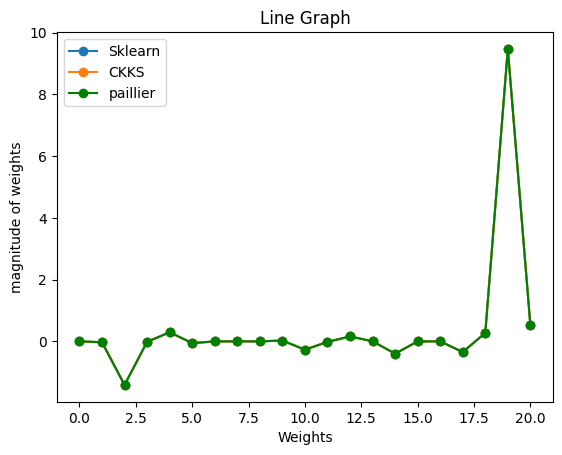

In [9]:
import matplotlib.pyplot as plt

plt.plot(weights_sk, label='Sklearn', marker='o')  
plt.plot(weights_ckks, label='CKKS', marker='o')  
plt.plot(weights_paillier, label='paillier', marker='o', color='green')  

plt.xlabel('Weights')
plt.ylabel('magnitude of weights')
plt.title('Line Graph')

plt.legend()

plt.show()

### MSE CKKS outputs

In [10]:
mse = mean_squared_error(unenc_preds_sk,unenc_preds_ckks)

# Print the result
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 3.2446481775136065e-08


### MSE Paillier outputs:

In [11]:
mse = mean_squared_error(unenc_preds_sk,unenc_preds_paillier)

# Print the result
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 9.442173575245906e-18


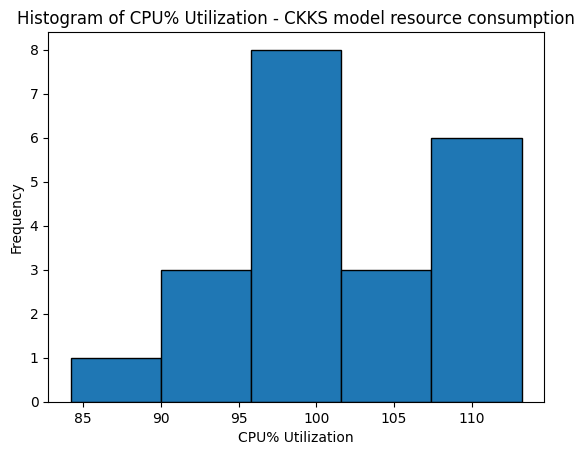

In [12]:
# Plot the histogram

filtered_ckks_cpu_util = [x for x in cpu_usages_ckks if x >= 50]

plt.hist(filtered_ckks_cpu_util, bins=5, edgecolor='black')  # You can adjust the number of bins as needed

# Add titles and labels
plt.title('Histogram of CPU% Utilization - CKKS model resource consumption')
plt.xlabel('CPU% Utilization')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [13]:
print(np.mean(filtered_ckks_cpu_util))
print(np.median(filtered_ckks_cpu_util))

101.6952380952381
100.2


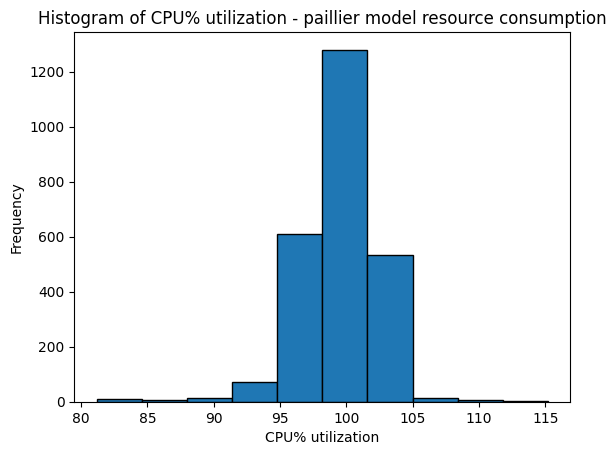

In [14]:
filtered_paillier_cpu_util = [x for x in cpu_usages_paillier if x >= 80]

plt.hist(filtered_paillier_cpu_util, bins=10, edgecolor='black')  # You can adjust the number of bins as needed

# Add titles and labels
plt.title('Histogram of CPU% utilization - paillier model resource consumption')
plt.xlabel('CPU% utilization')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [15]:
print(np.mean(filtered_paillier_cpu_util))
print(np.median(filtered_paillier_cpu_util))

99.47836349331236
99.9


In [16]:
# plt.plot(ram_usages_ckks)

# # Add labels and title
# plt.xlabel('seconds')
# plt.ylabel('ram% util')
# plt.title('Line Graph of ram% util for ckks model')

In [17]:
# plt.plot(ram_usages_paillier)

# # Add labels and title
# plt.xlabel('seconds')
# plt.ylabel('ram% util')
# plt.title('Line Graph of ram% util for paillier model')

In [18]:
train_time_ckks

25.35484480857849

In [19]:
train_time_paillier

2674.7212731838226

In [20]:
test_time_ckks

3.3370614051818848

In [21]:
test_time_paillier

44.56397771835327

In [22]:
def average_consecutive_difference(arr):
    if len(arr) < 2:
        # If the array has less than 2 elements, return 0 as the average difference is not defined
        return 0

    # Calculate the differences between consecutive elements
    differences = [abs(arr[i] - arr[i - 1]) for i in range(1, len(arr))]

    differences_1 = [x for x in differences if x > 0]
    return differences_1

    # # Calculate the average of the differences
    # average_difference = sum(differences) / len(differences)
    # return differences, average_difference


### ram usage analysis: (for ckks)

In [23]:
# p = average_consecutive_difference(ram_usages_ckks)

In [24]:
# p

In [25]:
# np.median(p)

In [26]:
import pandas as pd
y_test=pd.read_csv('y_test2.csv')
y_test=y_test.to_numpy()
y_test=y_test.reshape(-1)

unenc_preds_sk=np.array(unenc_preds_sk)
unenc_preds_sk=unenc_preds_sk.reshape(-1)



In [27]:
unenc_preds_sk=np.array(unenc_preds_sk)
unenc_preds_sk=unenc_preds_sk.reshape(-1)
unenc_preds_sk

unenc_preds_ckks=np.array(unenc_preds_ckks)
unenc_preds_ckks=unenc_preds_sk.reshape(-1)

### mse for sklearn:

In [28]:
mse = mean_squared_error(unenc_preds_sk,y_test)
mse

10.549915956551716

### mse for ckks:

In [29]:
mse = mean_squared_error(unenc_preds_ckks,y_test)
mse

10.549915956551716

### mse for paillier

In [30]:
mse=mean_squared_error(unenc_preds_paillier,y_test)
mse

10.549915956509903